In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import MultiLabelBinarizer
import warnings
import os.path
import seaborn as sns
import matplotlib.pyplot as plt

RND_STATE = 100412

In [2]:
def load_file(file_name):
    max_bytes = 2**31 - 1
    bytes_in = bytearray(0)
    input_size = os.path.getsize(file_name)
    with open(file_name, 'rb') as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    return pickle.loads(bytes_in)

## Configuration

In [3]:
DATA_PICKLE = '../data/merged_data.data'

In [4]:
data = load_file(DATA_PICKLE)

## Analysis with additional data

Overall data info

In [5]:
data.describe()

,average_wind_speed,snowfall,snow_depth,thunder,dust,haze,snow,cancelled,carrier_delay,crs_dep_time,...,fl_num,late_aircraft_delay,month,nas_delay,quarter,security_delay,weather_delay,fog,hail,damaging_wind
count,8.345615e+06,8.778441e+06,8.774678e+06,8.580379e+06,1.645315e+06,8.329632e+06,2.569771e+06,8.807371e+06,1.508472e+06,8.807371e+06,...,8.807371e+06,1.508472e+06,8.807371e+06,1.508472e+06,8.807371e+06,1.508472e+06,1.508472e+06,8.807371e+06,8.807371e+06,8.807371e+06
mean,3.105842e+01,1.279581e+00,7.551056e+00,1.844257e-01,9.745246e-03,1.746214e-01,9.746394e-03,1.319542e-02,2.084083e+01,1.329899e+03,...,2.173602e+03,2.483983e+01,6.261593e+00,1.471941e+01,2.420688e+00,8.538442e-02,2.850417e+00,3.971557e-01,1.981954e-02,1.220114e-02
std,2.036081e+01,1.253456e+01,4.354013e+01,3.878310e-01,9.823585e-02,3.796430e-01,9.824157e-02,1.141109e-01,6.205368e+01,4.892587e+02,...,1.724509e+03,4.703848e+01,3.401627e+00,3.321128e+01,1.103800e+00,2.740414e+00,2.404178e+01,4.893088e-01,1.393798e-01,1.097829e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.150000e+02,...,7.770000e+02,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.325000e+03,...,1.718000e+03,4.000000e+00,6.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,1.735000e+03,...,3.069000e+03,3.000000e+01,9.000000e+00,1.800000e+01,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.073000e+03,6.200000e+02,1.778000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.142000e+03,2.359000e+03,...,8.402000e+03,1.445000e+03,1.200000e+01,1.605000e+03,4.000000e+00,8.270000e+02,1.934000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Correlations

In [6]:
data.corr()

,average_wind_speed,snowfall,snow_depth,thunder,dust,haze,snow,cancelled,carrier_delay,crs_dep_time,...,fl_num,late_aircraft_delay,month,nas_delay,quarter,security_delay,weather_delay,fog,hail,damaging_wind
average_wind_speed,1.000000,0.027976,0.000400,-0.017202,0.108123,0.019018,0.136587,0.053636,0.008931,-0.005012,...,-0.000027,0.004121,-0.096792,0.014642,-0.098026,-0.001538,0.009101,0.025355,0.015527,0.097636
snowfall,0.027976,1.000000,0.432428,-0.044421,-0.012397,0.062265,0.236230,0.052380,-0.000498,0.000026,...,0.017233,0.008360,-0.039880,0.014018,-0.045977,-0.001489,0.029674,0.079928,0.041801,0.017212
snow_depth,0.000400,0.432428,1.000000,-0.078482,-0.021180,0.081216,0.191496,0.022507,0.003922,0.000320,...,0.028812,0.001082,-0.106835,0.001401,-0.107910,-0.000255,0.020940,0.057475,0.035040,0.000976
thunder,-0.017202,-0.044421,-0.078482,1.000000,0.050481,0.094349,-0.039056,0.017555,-0.015367,-0.001171,...,-0.018266,0.025314,0.016125,0.053937,0.022248,-0.004196,0.041100,0.278120,0.127409,0.058952
dust,0.108123,-0.012397,-0.021180,0.050481,1.000000,0.200068,-0.006456,0.000762,-0.006011,0.001290,...,-0.003176,0.008573,0.016115,0.024912,0.017870,-0.001541,0.018894,0.001628,-0.019368,-0.005307
haze,0.019018,0.062265,0.081216,0.094349,0.200068,1.000000,0.087075,0.015931,-0.002636,-0.003995,...,0.017085,0.002123,0.005220,0.023524,0.003942,-0.001075,0.023367,0.257573,0.038790,-0.003509
snow,0.136587,0.236230,0.191496,-0.039056,-0.006456,0.087075,1.000000,0.109194,-0.000845,-0.002600,...,0.008176,0.001684,-0.045663,0.035924,-0.050053,0.000474,0.038163,0.080781,0.044164,0.076165
cancelled,0.053636,0.052380,0.022507,0.017555,0.000762,0.015931,0.109194,1.000000,NaN,0.012365,...,0.013790,NaN,-0.009786,NaN,-0.010244,NaN,NaN,0.037434,0.033864,0.027607
carrier_delay,0.008931,-0.000498,0.003922,-0.015367,-0.006011,-0.002636,-0.000845,NaN,1.000000,-0.069954,...,0.044553,-0.085717,0.001822,-0.098376,0.003813,-0.009266,-0.035324,-0.012053,-0.007086,-0.001389
crs_dep_time,-0.005012,0.000026,0.000320,-0.001171,0.001290,-0.003995,-0.002600,0.012365,-0.069954,1.000000,...,0.007743,0.145827,-0.001858,-0.050626,-0.002134,-0.003299,-0.003406,-0.003419,0.000275,0.001365


In [7]:
def check_correlations(data_df, min_v=0.6):
    corr = data_df.corr()
    corrs = []
    for i in corr:
        for j in corr.index[corr[i] >= min_v]:
            if i != j and j not in corrs and i not in corrs:
                corrs.append(j)
                print("%s-->%s: r^2=%f" % (i,j, corr[i][corr.index == j].values[0]))
    if len(corrs) == 0:
        print('Everything is perfect')

In [8]:
check_correlations(data)

carrier_delay-->dep_delay_new: r^2=0.687620
month-->quarter: r^2=0.967794


Plotting data

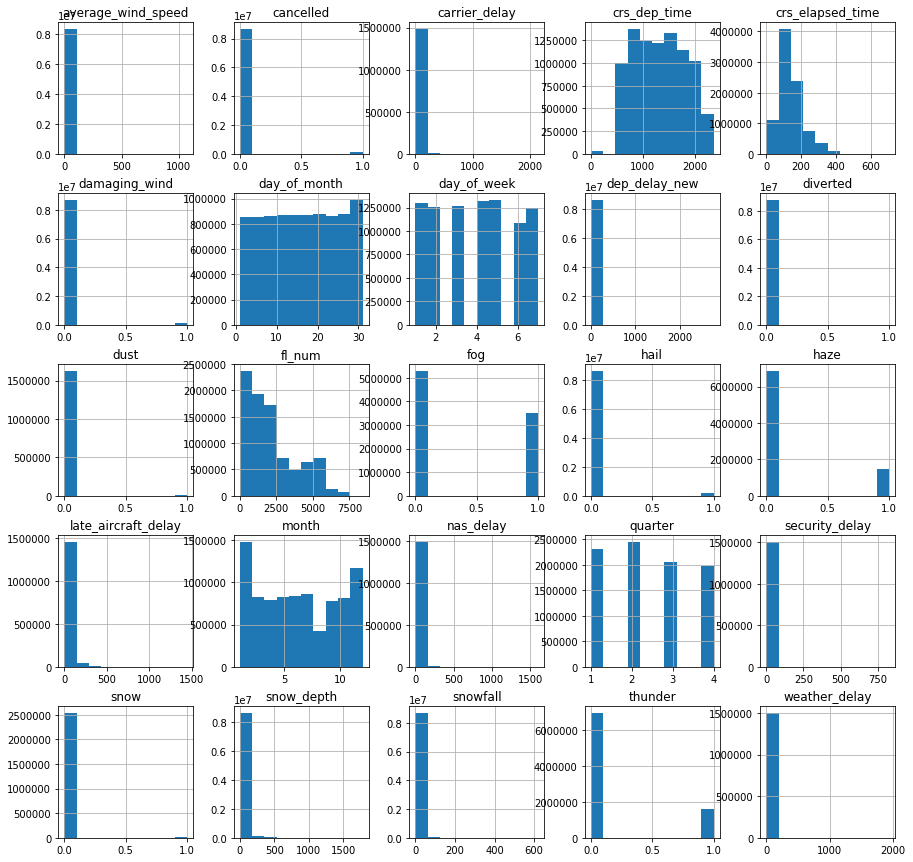

In [9]:
data.hist(figsize=(15, 15));

Plotting classes

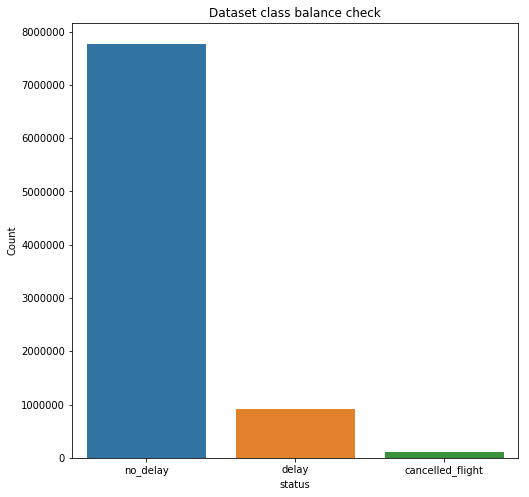

In [10]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x = data.status)
ax.set_title('Dataset class balance check')
ax.set_ylabel('Count')
plt.show()

huge imbalance here

Day / delay

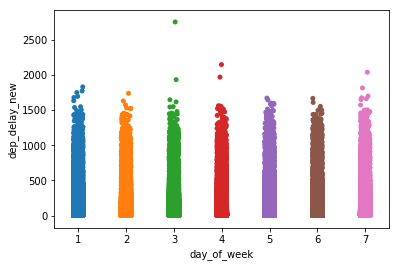

In [11]:
sns.stripplot(x="day_of_week", y="dep_delay_new", data=data, jitter=True)

Month / Delay

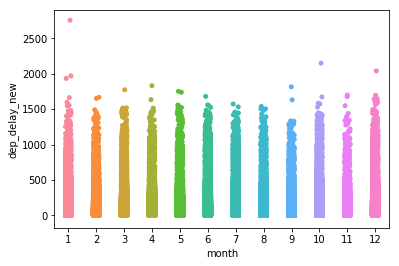

In [12]:
sns.stripplot(x="month", y="dep_delay_new", data=data, jitter=True)

Flights per airline

In [13]:
airlines_group = data[['status', 'carrier']]
airlines_group_num = airlines_group.groupby(['carrier']).size()
airlines_group = data[['status', 'carrier']]
airlines_group = airlines_group[airlines_group['status'] != 'no_delay']
airlines_group_delays_num = airlines_group.groupby(['carrier']).size()
delay_info = pd.DataFrame({'Carrier': np.unique(airlines_group.carrier.values), 'Number of flights': airlines_group_num.values, 'Number of delays': airlines_group_delays_num.values})

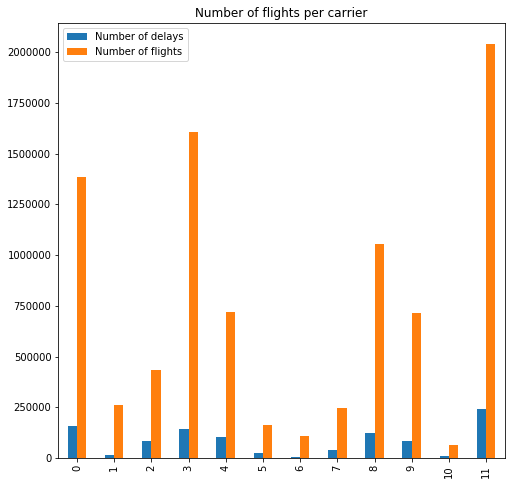

In [14]:
delay_info.plot(kind='bar', figsize=(8, 8), title = 'Number of flights per carrier')

Delay ratings

In [15]:
delay_info['Delay index'] = delay_info['Number of delays'] / delay_info['Number of flights']

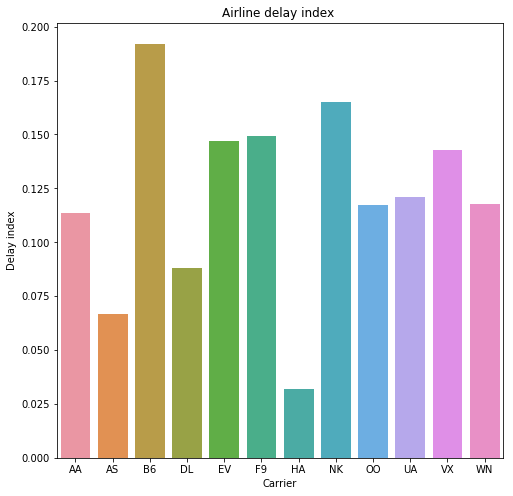

In [16]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x="Carrier", y="Delay index", data=delay_info)
ax.set_title('Airline delay index ')
plt.show()